# Preparing

In [143]:
import numpy as np
np.random.seed(23521672)
import matplotlib.pyplot as plt

In [144]:
# Define target function
def target_function(x):
    return np.sin(1+x**2) + np.random.normal(0,0.03,x.shape)

In [145]:
# Define create random dataset function with n_samples
def create_train_test(n_sam):
    X_train = np.random.rand(n_sam)
    y_train = target_function(X_train)
    X_test = np.random.rand(n_sam)
    y_test = target_function(X_test)
    return X_train.reshape(-1,1), y_train, X_test.reshape(-1,1), y_test

# Experiment 1

## Create datasets with 10 data point

In [146]:
D1_X_train, D1_y_train, D1_X_test, D1_y_test = create_train_test(10)
D2_X_train, D2_y_train, D2_X_test, D2_y_test = create_train_test(10)
D3_X_train, D3_y_train, D3_X_test, D3_y_test = create_train_test(10)

### Visualize datasets

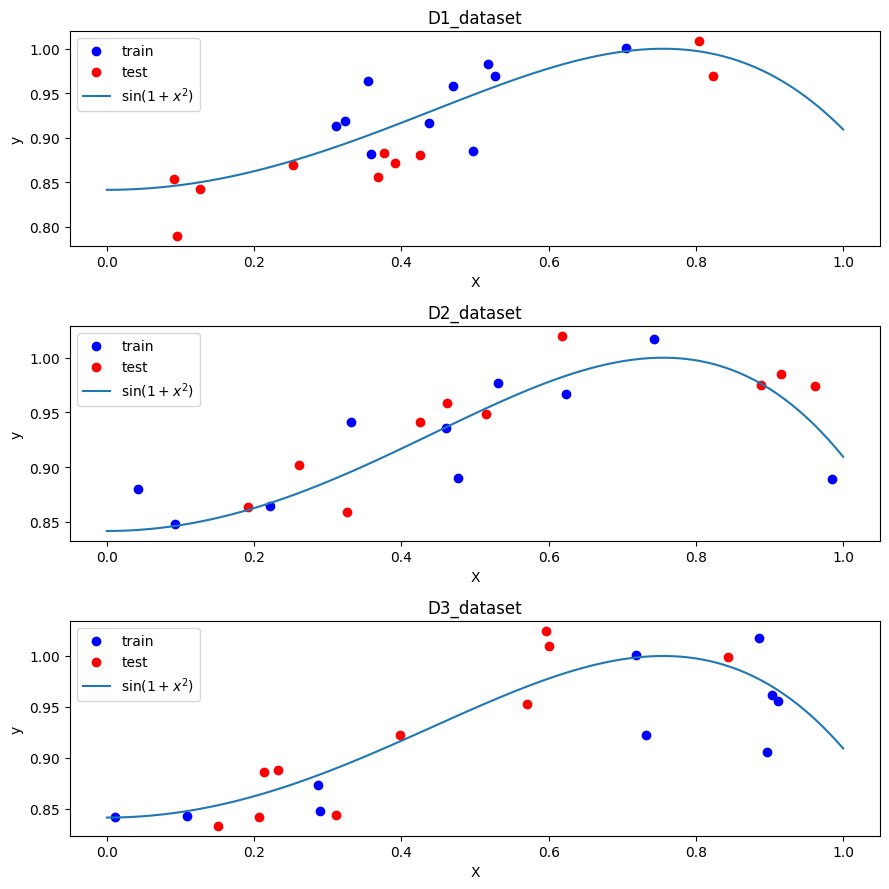

In [147]:
plt.figure(figsize=(9, 9))
X_visual_target = np.linspace(0,1,100)
y_visual_target = np.sin(1 + X_visual_target**2)

#D1 plot
plt.subplot(3,1,1)
plt.scatter(x=D1_X_train, y=D1_y_train, color='blue', label='train')
plt.scatter(x=D1_X_test, y=D1_y_test, color='red', label='test')
plt.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
plt.xlabel('x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('D1_dataset')

#D2 plot
plt.subplot(3,1,2)
plt.scatter(x=D2_X_train, y=D2_y_train, color='blue', label='train')
plt.scatter(x=D2_X_test, y=D2_y_test, color='red', label='test')
plt.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('D2_dataset')

#D3 plot
plt.subplot(3,1,3)
plt.scatter(x=D3_X_train, y=D3_y_train, color='blue', label='train')
plt.scatter(x=D3_X_test, y=D3_y_test, color='red', label='test')
plt.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('D3_dataset')
plt.tight_layout()

## Train model with 9-degree models polynomial regression

### D1 Dataset

In [148]:
#Import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Init a list of pipeline have degree from 1 to 9
pipelines_list = [make_pipeline(PolynomialFeatures(degree), LinearRegression()) for degree in range(1, 10)]

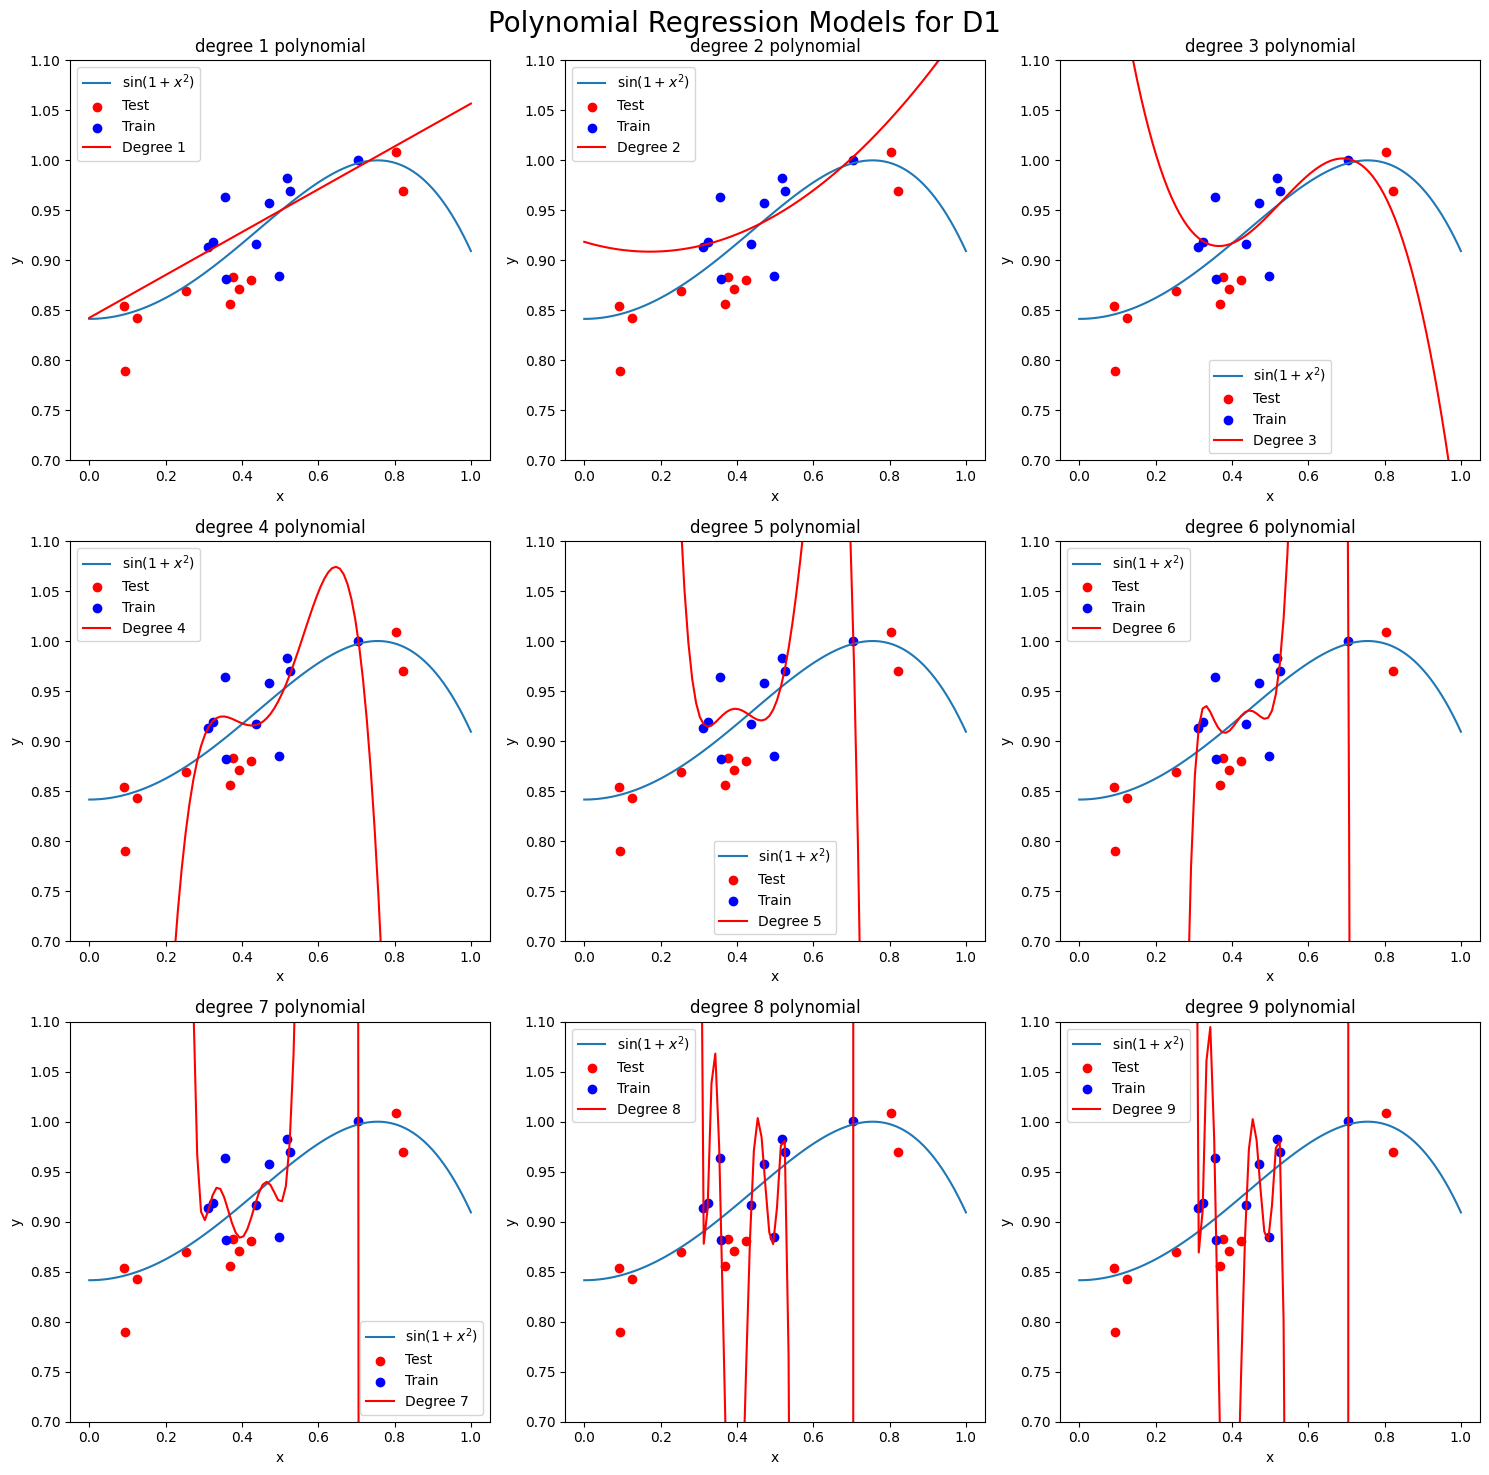

In [149]:
# Train model with data of dataset D1
for pipeline in pipelines_list:
    pipeline.fit(D1_X_train, D1_y_train)

# Draw a chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D1",size=20)
# Init the data to draw a model
X_pred = np.linspace(0, 1, 100).reshape(-1, 1)

for i, (degree, pipeline) in enumerate(zip(range(1, 10), pipelines_list)):
    y_pred = pipeline.predict(X_pred)
    ax = axs[i // 3, i % 3]
    ax.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
    ax.scatter(D1_X_test, D1_y_test, color='red', label='Test')
    ax.scatter(D1_X_train, D1_y_train, color='blue', label='Train')
    ax.plot(X_pred, y_pred, color='red', label=f'Degree {degree}')
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

### Create a table include E_in and E_out of D1 dataset

In [150]:
#Import libary
from sklearn.metrics import mean_squared_error
import pandas as pd

In [151]:
# Init a array to save E_in and E_out
results = []

for degree, pipeline in enumerate(pipelines_list, start=1):
    # Preidct
    y_train_pred = pipeline.predict(D1_X_train)
    y_test_pred = pipeline.predict(D1_X_test)
    
    # Calculate E_in and E_out
    E_in = mean_squared_error(D1_y_train, y_train_pred)
    E_out = mean_squared_error(D1_y_test, y_test_pred)
    
    # Save the results
    results.append((degree, E_in, E_out))

# Create a dataframe to save values
results_df = pd.DataFrame(results, columns=['Degree', 'E_in', 'E_out'])

# Format output
results_df['E_in'] = results_df['E_in'].map(lambda x: f'{x:.5f}')
results_df['E_out'] = results_df['E_out'].map(lambda x: f'{x:.5f}')

# Show the dataframe
print(results_df)

   Degree     E_in            E_out
0       1  0.00094          0.00211
1       2  0.00091          0.00429
2       3  0.00088          0.03969
3       4  0.00082          0.91676
4       5  0.00079         25.39529
5       6  0.00072       2869.77819
6       7  0.00067      56397.65474
7       8  0.00001  182866905.72066
8       9  0.00000  332605145.18433


| Degree | E_in     | E_out          |
|--------|----------|----------------|
| 1      | 0.00094  | 0.00211        |
| 2      | 0.00091  | 0.00429        |
| 3      | 0.00088  | 0.03969        |
| 4      | 0.00082  | 0.91676        |
| 5      | 0.00079  | 25.39529       |
| 6      | 0.00072  | 2869.77819     |
| 7      | 0.00067  | 56397.65474    |
| 8      | 0.00001  | 182866905.72066|
| 9      | 0.00000  | 332605145.18433|

### D2 dataset

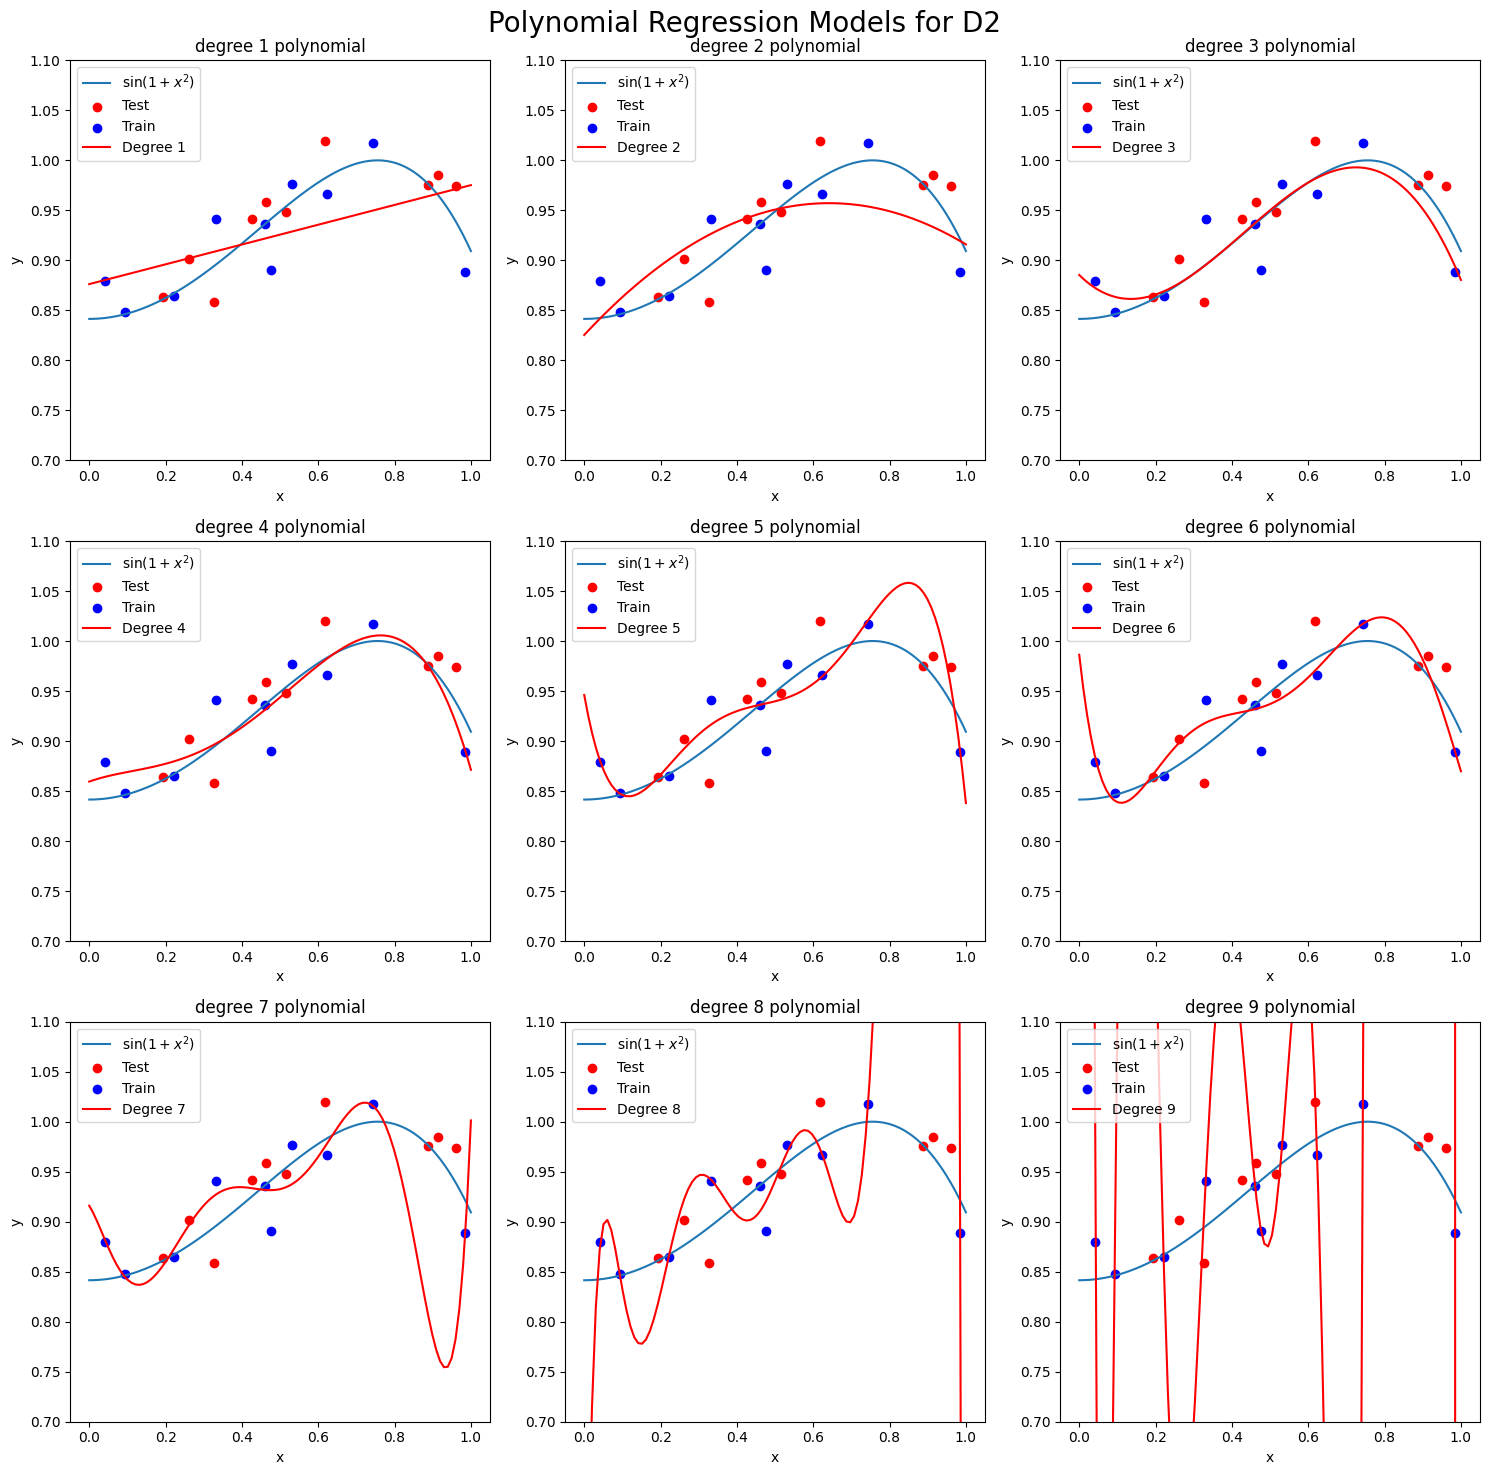

In [152]:
# Train model with data of dataset D2
for pipeline in pipelines_list:
    pipeline.fit(D2_X_train, D2_y_train)

# Draw a chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D2",size=20)

for i, (degree, pipeline) in enumerate(zip(range(1, 10), pipelines_list)):
    y_pred = pipeline.predict(X_pred)
    ax = axs[i // 3, i % 3]
    ax.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
    ax.scatter(D2_X_test, D2_y_test, color='red', label='Test')
    ax.scatter(D2_X_train, D2_y_train, color='blue', label='Train')
    ax.plot(X_pred, y_pred, color='red', label=f'Degree {degree}')
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

### D3 dataset

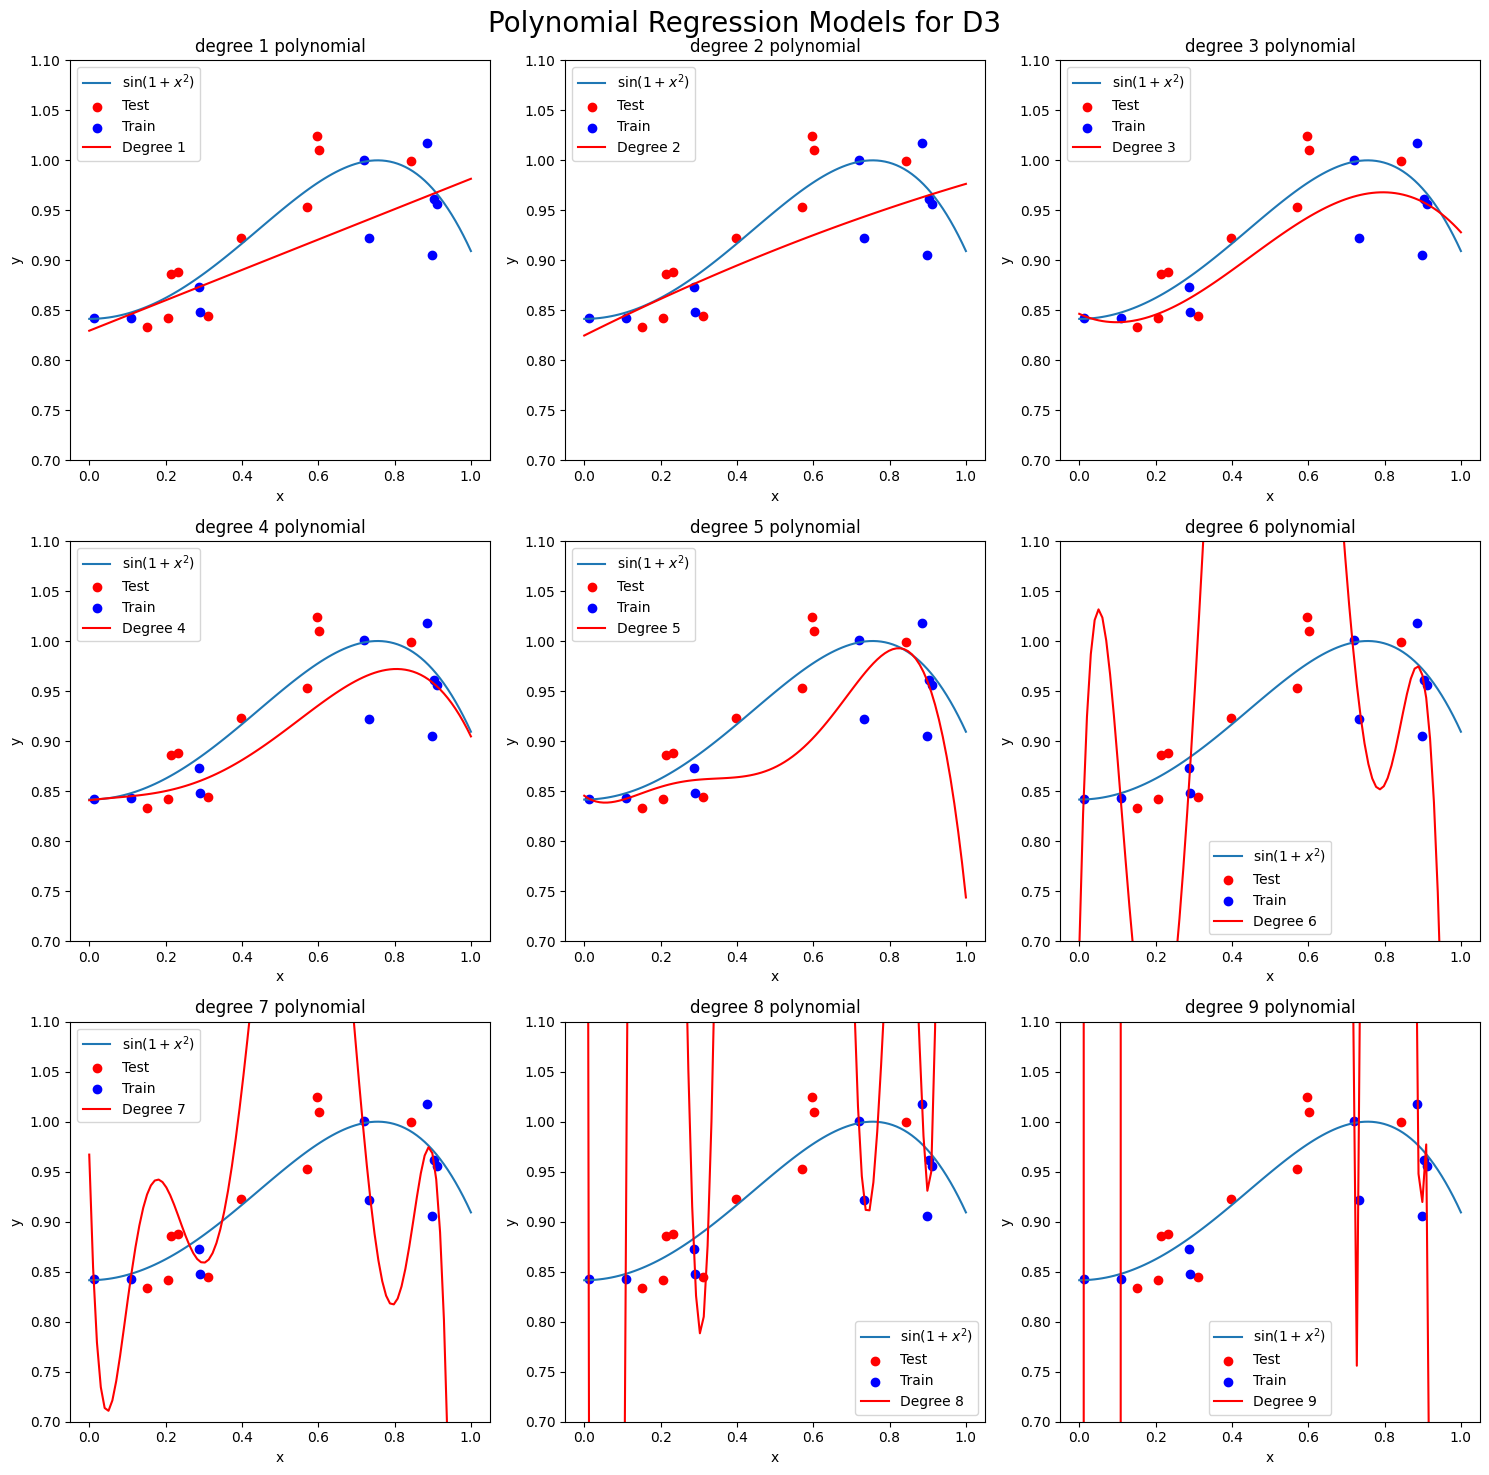

In [153]:
# Train model with data of dataset D3
for pipeline in pipelines_list:
    pipeline.fit(D3_X_train, D3_y_train)

# Draw a chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D3",size=20)

for i, (degree, pipeline) in enumerate(zip(range(1, 10), pipelines_list)):
    y_pred = pipeline.predict(X_pred)
    ax = axs[i // 3, i % 3]
    ax.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
    ax.scatter(D3_X_test, D3_y_test, color='red', label='Test')
    ax.scatter(D3_X_train, D3_y_train, color='blue', label='Train')
    ax.plot(X_pred, y_pred, color='red', label=f'Degree {degree}')
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

# Experiment 2


## Create datasets with 100 data point

In [154]:
D1_X_train, D1_y_train, D1_X_test, D1_y_test = create_train_test(100)
D2_X_train, D2_y_train, D2_X_test, D2_y_test = create_train_test(100)
D3_X_train, D3_y_train, D3_X_test, D3_y_test = create_train_test(100)

### Visualize datasets

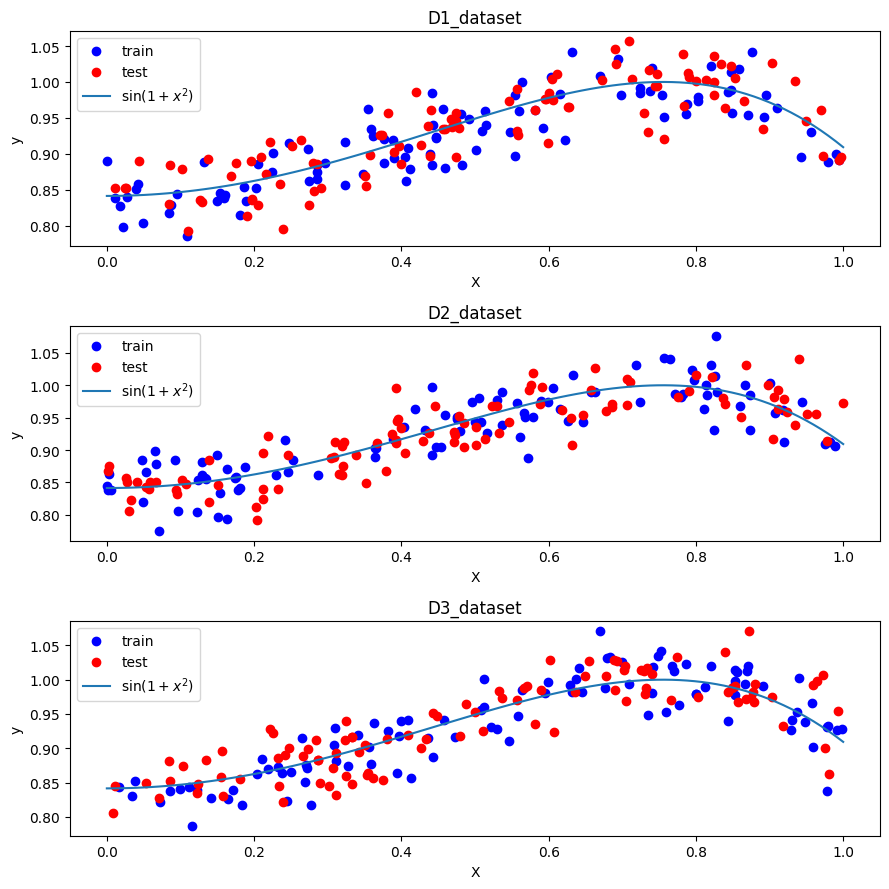

In [155]:
plt.figure(figsize=(9, 9))
X_visual_target = np.linspace(0,1,100)
y_visual_target = np.sin(1 + X_visual_target**2)

#D1 plot
plt.subplot(3,1,1)
plt.scatter(x=D1_X_train, y=D1_y_train, color='blue', label='train')
plt.scatter(x=D1_X_test, y=D1_y_test, color='red', label='test')
plt.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
plt.xlabel('x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('D1_dataset')

#D2 plot
plt.subplot(3,1,2)
plt.scatter(x=D2_X_train, y=D2_y_train, color='blue', label='train')
plt.scatter(x=D2_X_test, y=D2_y_test, color='red', label='test')
plt.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('D2_dataset')

#D3 plot
plt.subplot(3,1,3)
plt.scatter(x=D3_X_train, y=D3_y_train, color='blue', label='train')
plt.scatter(x=D3_X_test, y=D3_y_test, color='red', label='test')
plt.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('D3_dataset')
plt.tight_layout()

## Train model with 9-degree models polynomial regression

### D1 Dataset

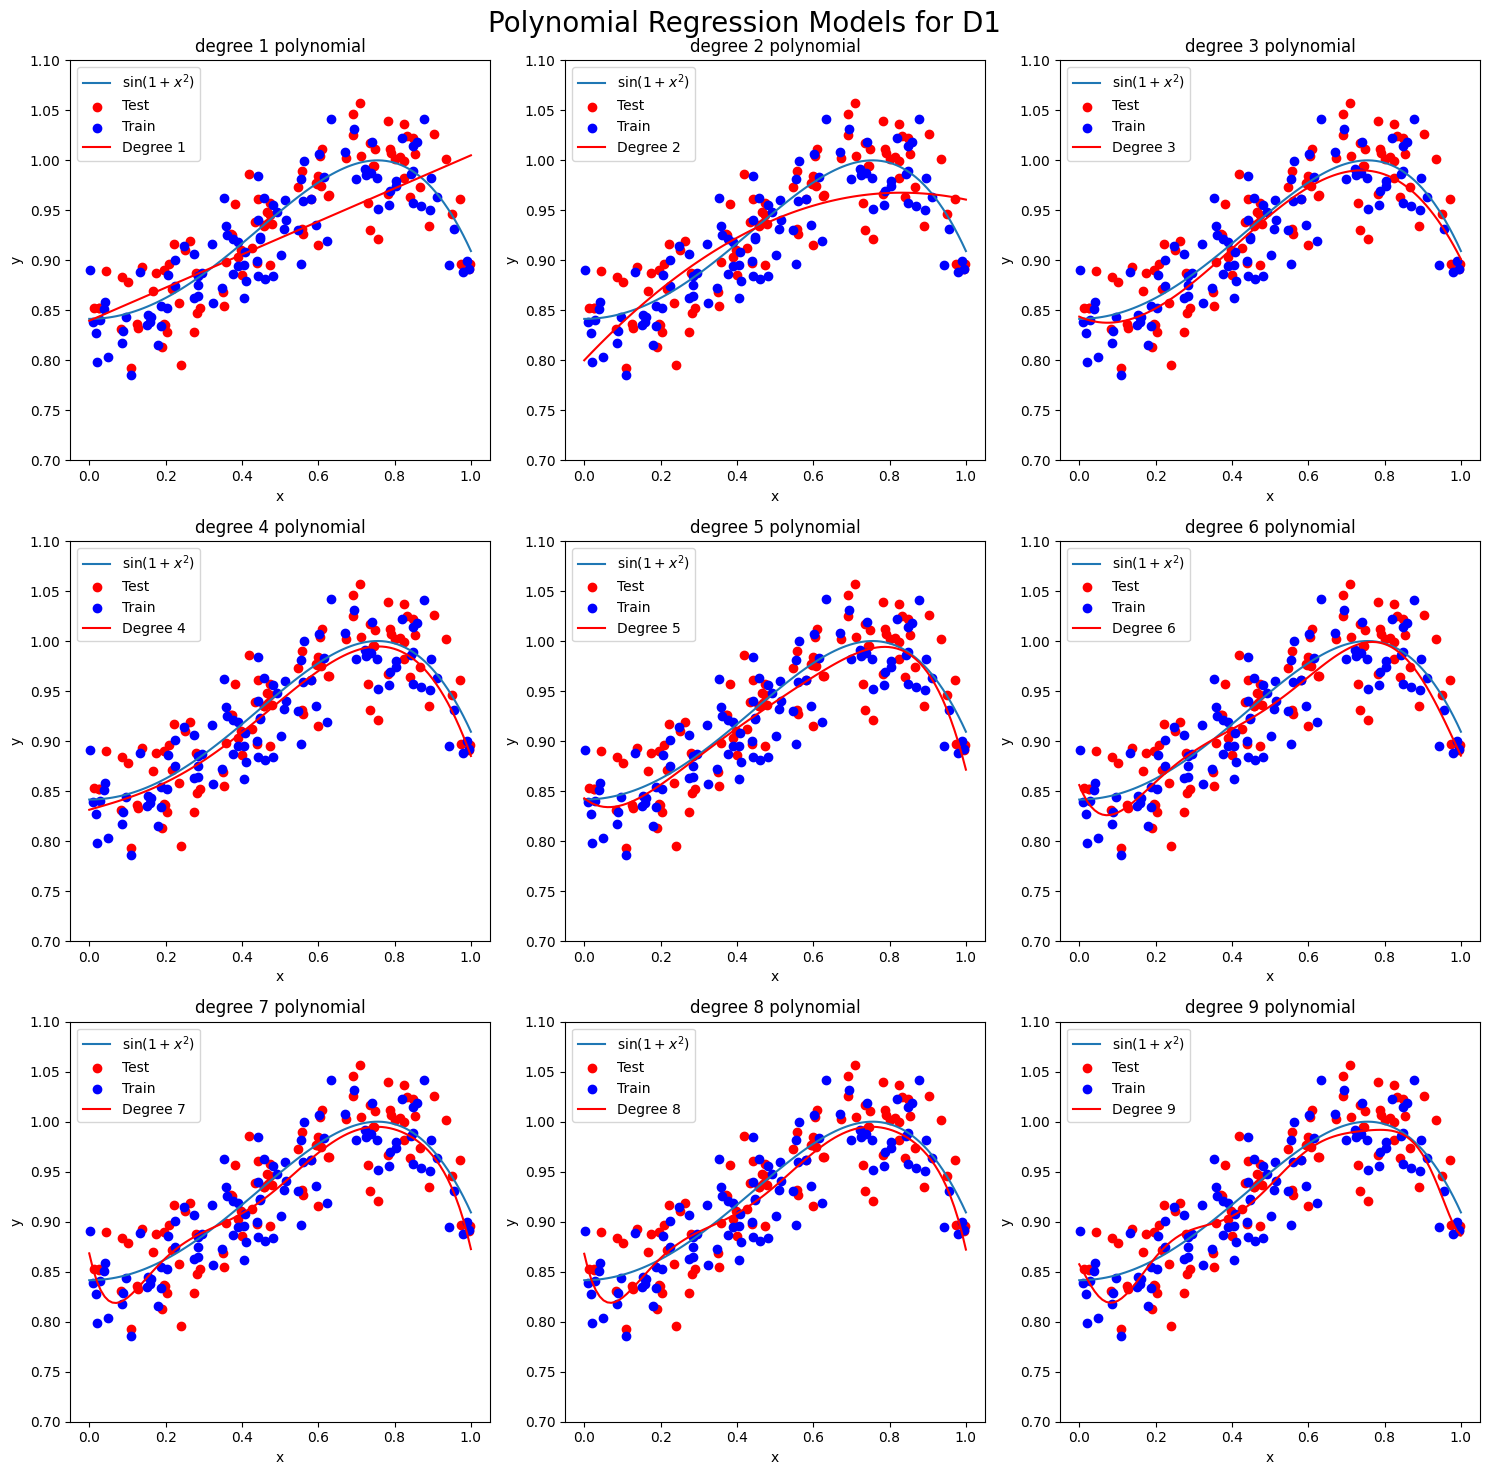

In [156]:
# Train model with data of dataset D1
for pipeline in pipelines_list:
    pipeline.fit(D1_X_train, D1_y_train)

# Draw a chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D1",size=20)
# Init the data to draw a model
X_pred = np.linspace(0, 1, 100).reshape(-1, 1)

for i, (degree, pipeline) in enumerate(zip(range(1, 10), pipelines_list)):
    y_pred = pipeline.predict(X_pred)
    ax = axs[i // 3, i % 3]
    ax.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
    ax.scatter(D1_X_test, D1_y_test, color='red', label='Test')
    ax.scatter(D1_X_train, D1_y_train, color='blue', label='Train')
    ax.plot(X_pred, y_pred, color='red', label=f'Degree {degree}')
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

### Create a table include E_in and E_out of D1 dataset

In [157]:
# Init a array to save E_in and E_out
results = []

for degree, pipeline in enumerate(pipelines_list, start=1):
    # Preidct
    y_train_pred = pipeline.predict(D1_X_train)
    y_test_pred = pipeline.predict(D1_X_test)
    
    # Calculate E_in and E_out
    E_in = mean_squared_error(D1_y_train, y_train_pred)
    E_out = mean_squared_error(D1_y_test, y_test_pred)
    
    # Save the results
    results.append((degree, E_in, E_out))

# Create a dataframe to save values
results_df = pd.DataFrame(results, columns=['Degree', 'E_in', 'E_out'])

# Format output
results_df['E_in'] = results_df['E_in'].map(lambda x: f'{x:.5f}')
results_df['E_out'] = results_df['E_out'].map(lambda x: f'{x:.5f}')

# Show the dataframe
print(results_df)

   Degree     E_in    E_out
0       1  0.00158  0.00183
1       2  0.00125  0.00155
2       3  0.00087  0.00106
3       4  0.00084  0.00105
4       5  0.00082  0.00106
5       6  0.00080  0.00110
6       7  0.00079  0.00111
7       8  0.00079  0.00111
8       9  0.00078  0.00114


| Degree | E_in   | E_out  |
|--------|--------|--------|
| 1      | 0.00158| 0.00183|
| 2      | 0.00125| 0.00155|
| 3      | 0.00087| 0.00106|
| 4      | 0.00084| 0.00105|
| 5      | 0.00082| 0.00106|
| 6      | 0.00080| 0.00110|
| 7      | 0.00079| 0.00111|
| 8      | 0.00079| 0.00111|
| 9      | 0.00078| 0.00114|

### D2 dataset

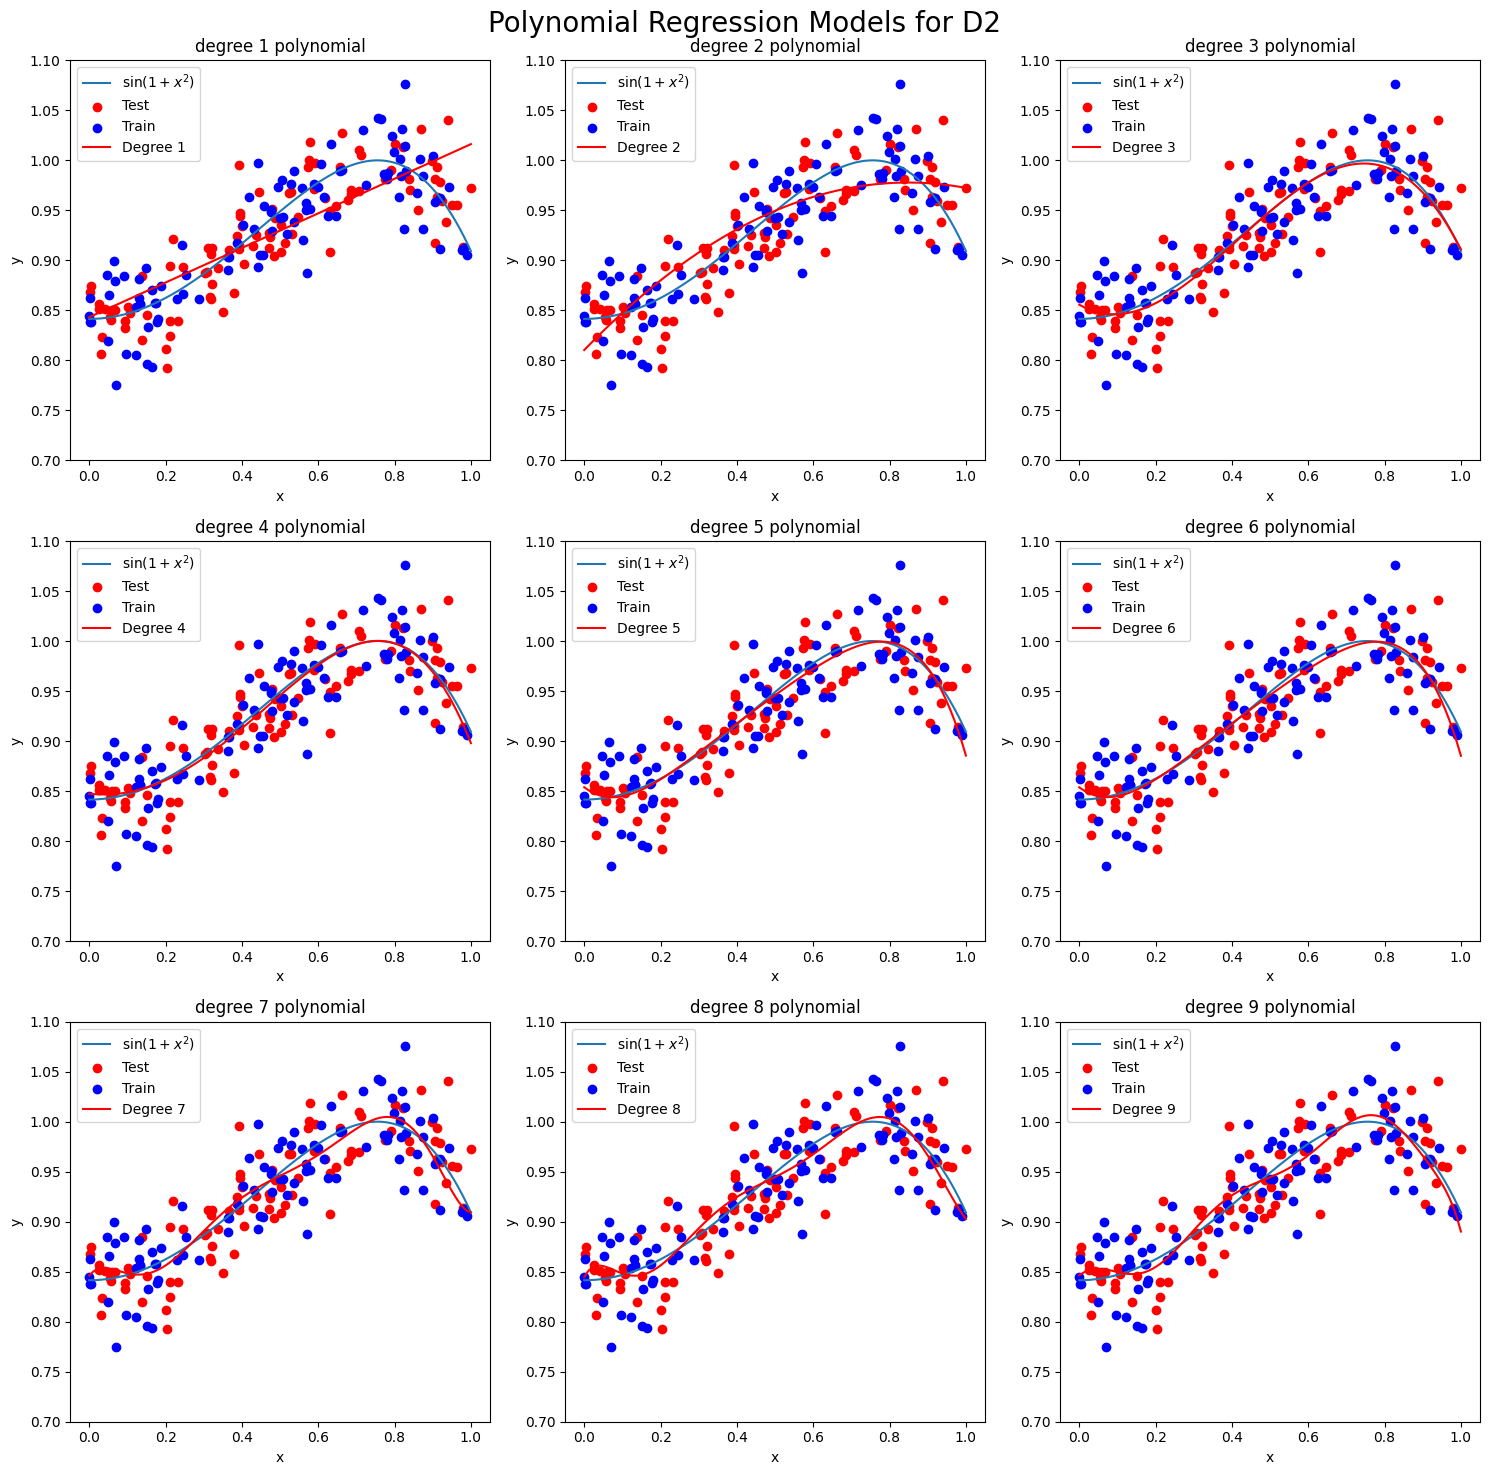

In [158]:
# Train model with data of dataset D2
for pipeline in pipelines_list:
    pipeline.fit(D2_X_train, D2_y_train)

# Draw a chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D2",size=20)

for i, (degree, pipeline) in enumerate(zip(range(1, 10), pipelines_list)):
    y_pred = pipeline.predict(X_pred)
    ax = axs[i // 3, i % 3]
    ax.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
    ax.scatter(D2_X_test, D2_y_test, color='red', label='Test')
    ax.scatter(D2_X_train, D2_y_train, color='blue', label='Train')
    ax.plot(X_pred, y_pred, color='red', label=f'Degree {degree}')
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

### D3 dataset

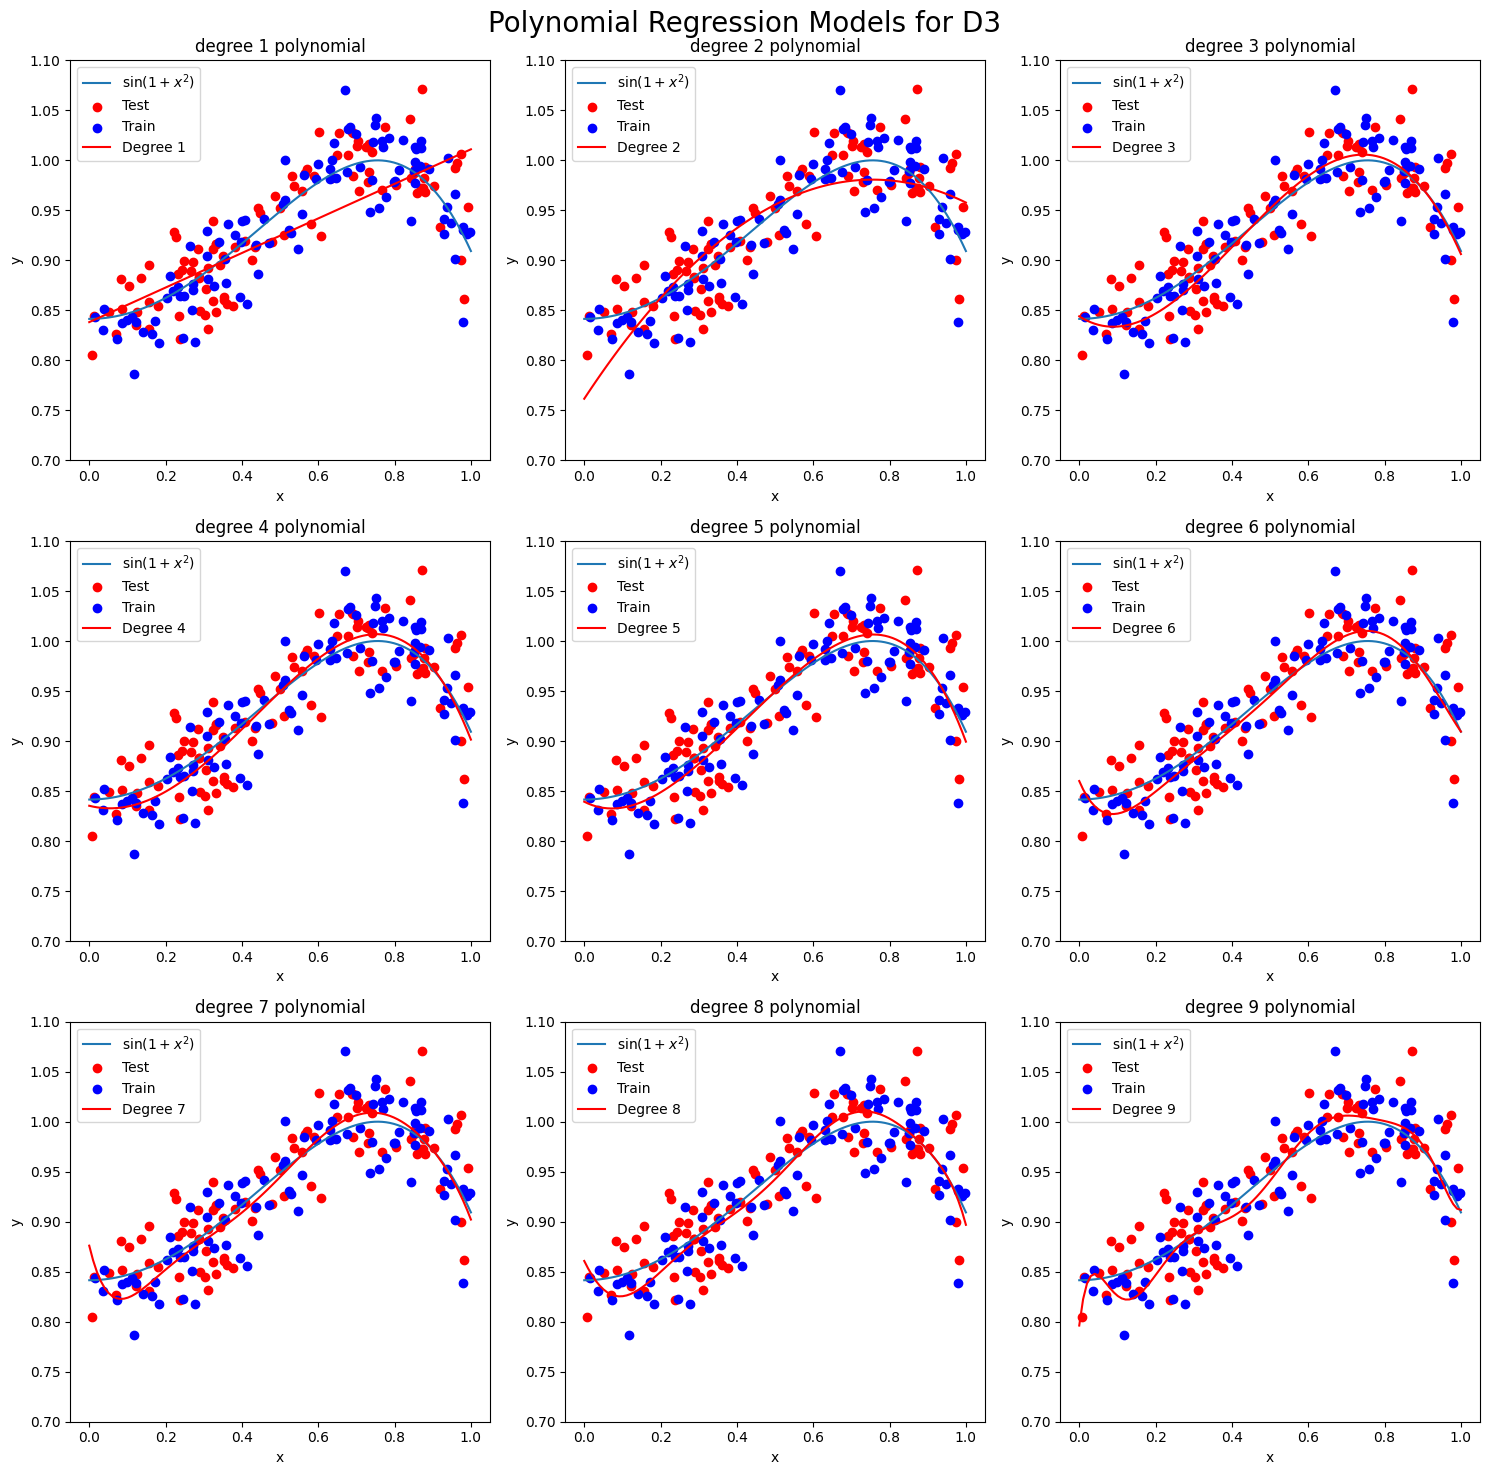

In [159]:
# Train model with data of dataset D3
for pipeline in pipelines_list:
    pipeline.fit(D3_X_train, D3_y_train)

# Draw a chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D3",size=20)

for i, (degree, pipeline) in enumerate(zip(range(1, 10), pipelines_list)):
    y_pred = pipeline.predict(X_pred)
    ax = axs[i // 3, i % 3]
    ax.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
    ax.scatter(D3_X_test, D3_y_test, color='red', label='Test')
    ax.scatter(D3_X_train, D3_y_train, color='blue', label='Train')
    ax.plot(X_pred, y_pred, color='red', label=f'Degree {degree}')
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

# Experiment 3

## Create datasets with 1000 data point

In [160]:
D1_X_train, D1_y_train, D1_X_test, D1_y_test = create_train_test(1000)
D2_X_train, D2_y_train, D2_X_test, D2_y_test = create_train_test(1000)
D3_X_train, D3_y_train, D3_X_test, D3_y_test = create_train_test(1000)

### Visualize datasets

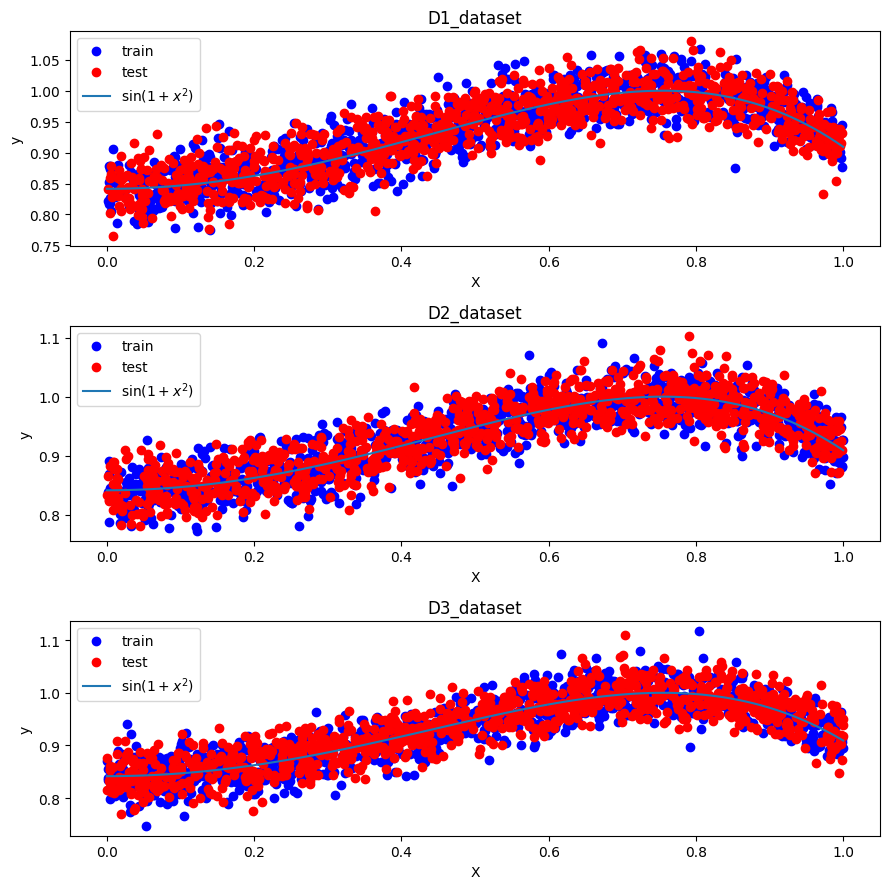

In [161]:
plt.figure(figsize=(9, 9))
X_visual_target = np.linspace(0,1,100)
y_visual_target = np.sin(1 + X_visual_target**2)

#D1 plot
plt.subplot(3,1,1)
plt.scatter(x=D1_X_train, y=D1_y_train, color='blue', label='train')
plt.scatter(x=D1_X_test, y=D1_y_test, color='red', label='test')
plt.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
plt.xlabel('x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('D1_dataset')

#D2 plot
plt.subplot(3,1,2)
plt.scatter(x=D2_X_train, y=D2_y_train, color='blue', label='train')
plt.scatter(x=D2_X_test, y=D2_y_test, color='red', label='test')
plt.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('D2_dataset')

#D3 plot
plt.subplot(3,1,3)
plt.scatter(x=D3_X_train, y=D3_y_train, color='blue', label='train')
plt.scatter(x=D3_X_test, y=D3_y_test, color='red', label='test')
plt.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('D3_dataset')
plt.tight_layout()

## Train model with 9-degree models polynomial regression

### D1 Dataset

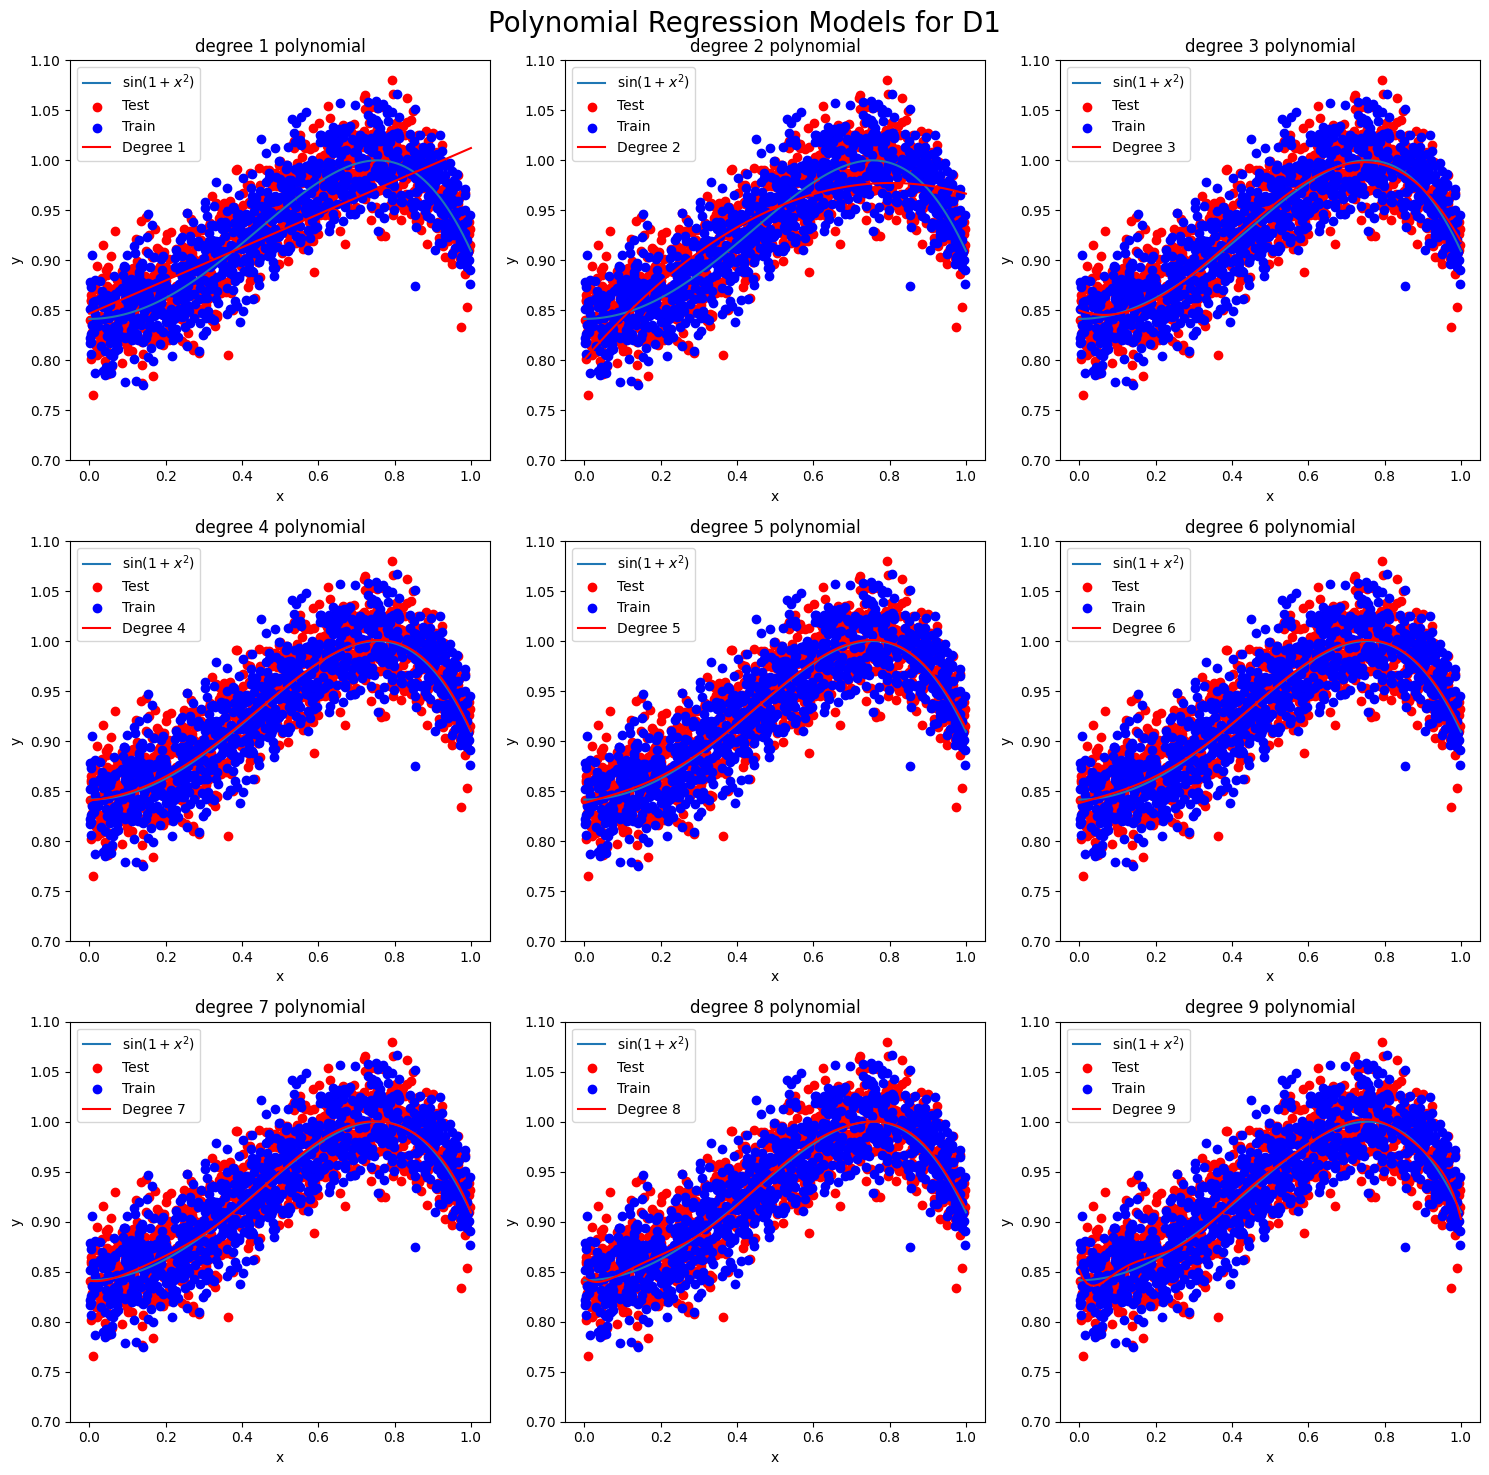

In [162]:
# Train model with data of dataset D1
for pipeline in pipelines_list:
    pipeline.fit(D1_X_train, D1_y_train)

# Draw a chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D1",size=20)
# Init the data to draw a model
X_pred = np.linspace(0, 1, 100).reshape(-1, 1)

for i, (degree, pipeline) in enumerate(zip(range(1, 10), pipelines_list)):
    y_pred = pipeline.predict(X_pred)
    ax = axs[i // 3, i % 3]
    ax.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
    ax.scatter(D1_X_test, D1_y_test, color='red', label='Test')
    ax.scatter(D1_X_train, D1_y_train, color='blue', label='Train')
    ax.plot(X_pred, y_pred, color='red', label=f'Degree {degree}')
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

### Create a table include E_in and E_out of D1 dataset

In [163]:
# Init a array to save E_in and E_out
results = []

for degree, pipeline in enumerate(pipelines_list, start=1):
    # Preidct
    y_train_pred = pipeline.predict(D1_X_train)
    y_test_pred = pipeline.predict(D1_X_test)
    
    # Calculate E_in and E_out
    E_in = mean_squared_error(D1_y_train, y_train_pred)
    E_out = mean_squared_error(D1_y_test, y_test_pred)
    
    # Save the results
    results.append((degree, E_in, E_out))

# Create a dataframe to save values
results_df = pd.DataFrame(results, columns=['Degree', 'E_in', 'E_out'])

# Format output
results_df['E_in'] = results_df['E_in'].map(lambda x: f'{x:.5f}')
results_df['E_out'] = results_df['E_out'].map(lambda x: f'{x:.5f}')

# Show the dataframe
print(results_df)

   Degree     E_in    E_out
0       1  0.00161  0.00170
1       2  0.00119  0.00124
2       3  0.00088  0.00092
3       4  0.00087  0.00091
4       5  0.00087  0.00091
5       6  0.00087  0.00091
6       7  0.00087  0.00092
7       8  0.00087  0.00091
8       9  0.00086  0.00092


| Degree | E_in   | E_out  |
|--------|--------|--------|
| 1      | 0.00161| 0.00170|
| 2      | 0.00119| 0.00124|
| 3      | 0.00088| 0.00092|
| 4      | 0.00087| 0.00091|
| 5      | 0.00087| 0.00091|
| 6      | 0.00087| 0.00091|
| 7      | 0.00087| 0.00092|
| 8      | 0.00087| 0.00091|
| 9      | 0.00086| 0.00092|

### D2 dataset

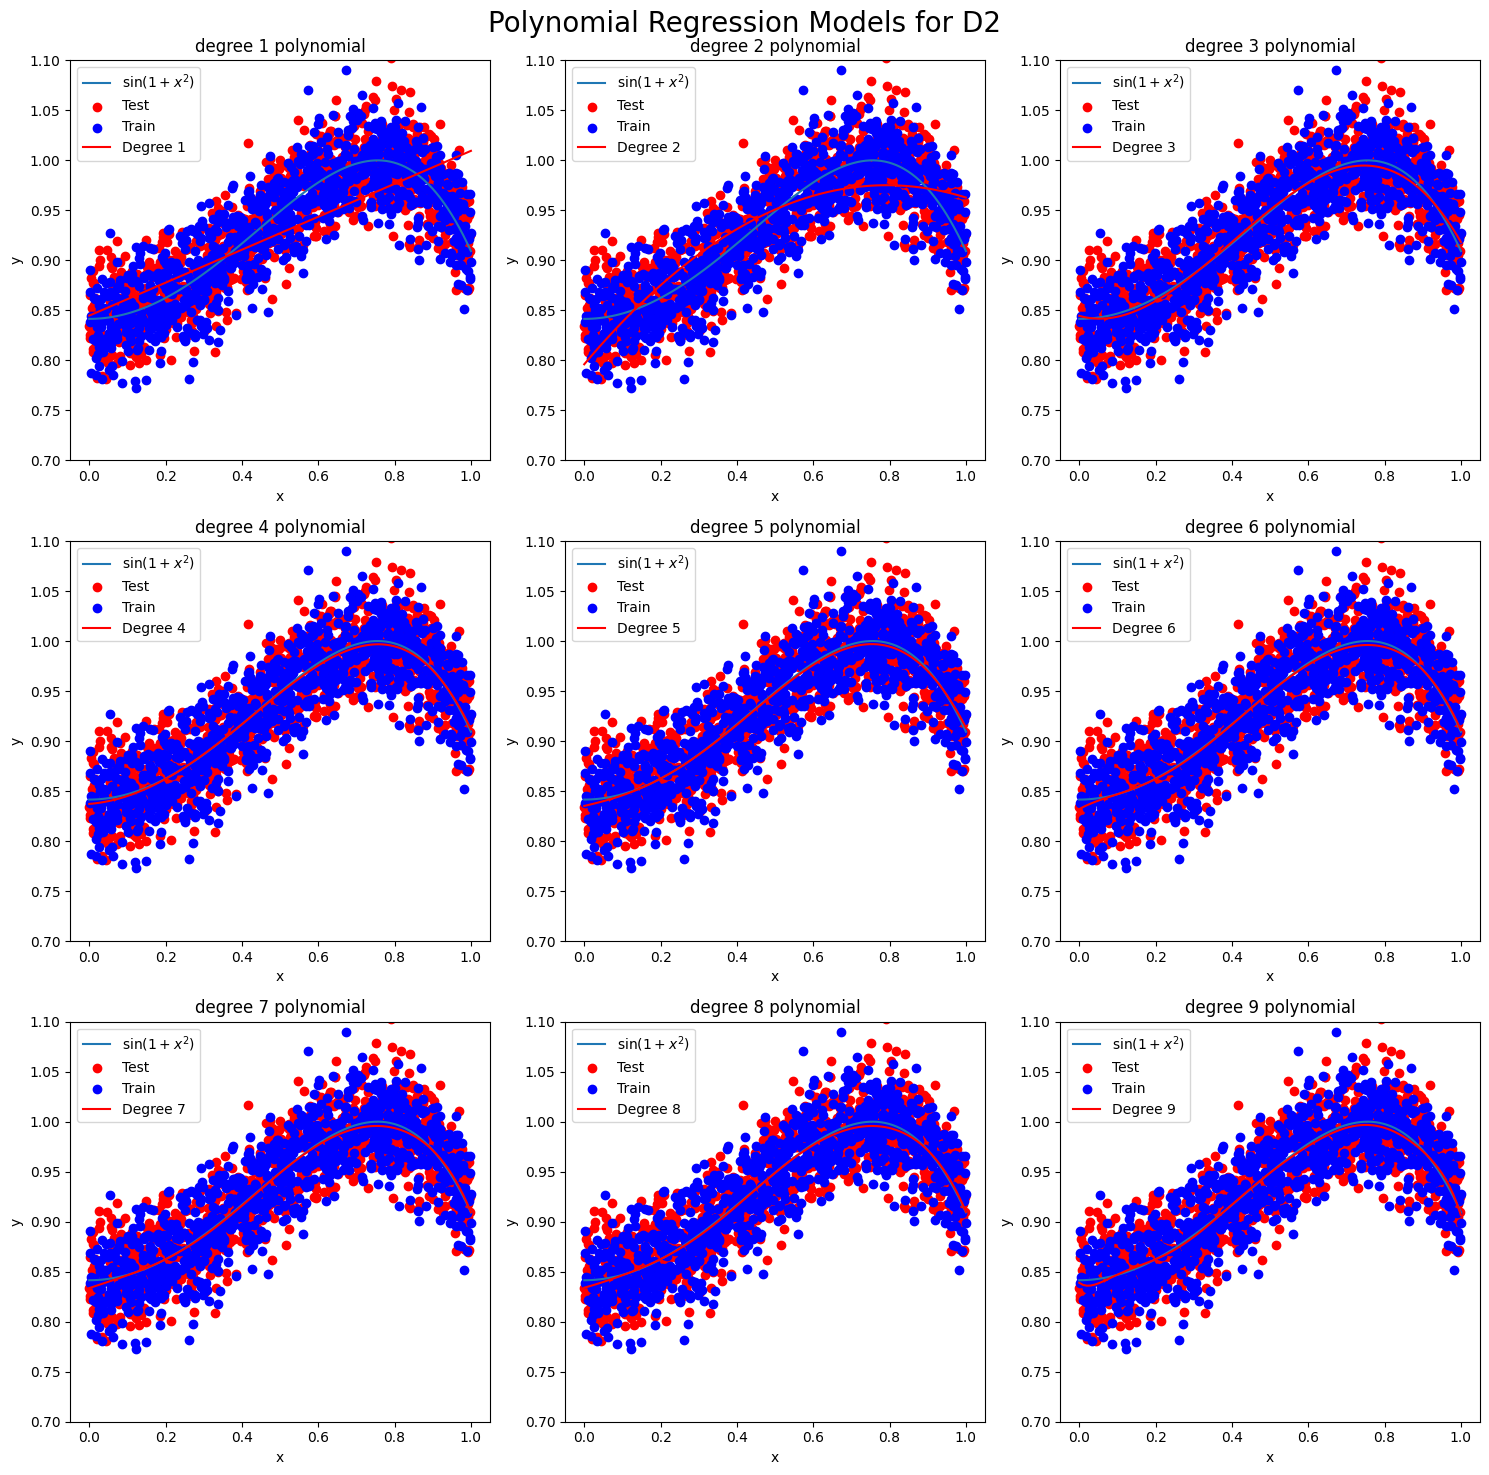

In [164]:
# Train model with data of dataset D2
for pipeline in pipelines_list:
    pipeline.fit(D2_X_train, D2_y_train)

# Draw a chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D2",size=20)

for i, (degree, pipeline) in enumerate(zip(range(1, 10), pipelines_list)):
    y_pred = pipeline.predict(X_pred)
    ax = axs[i // 3, i % 3]
    ax.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
    ax.scatter(D2_X_test, D2_y_test, color='red', label='Test')
    ax.scatter(D2_X_train, D2_y_train, color='blue', label='Train')
    ax.plot(X_pred, y_pred, color='red', label=f'Degree {degree}')
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

### D3 dataset

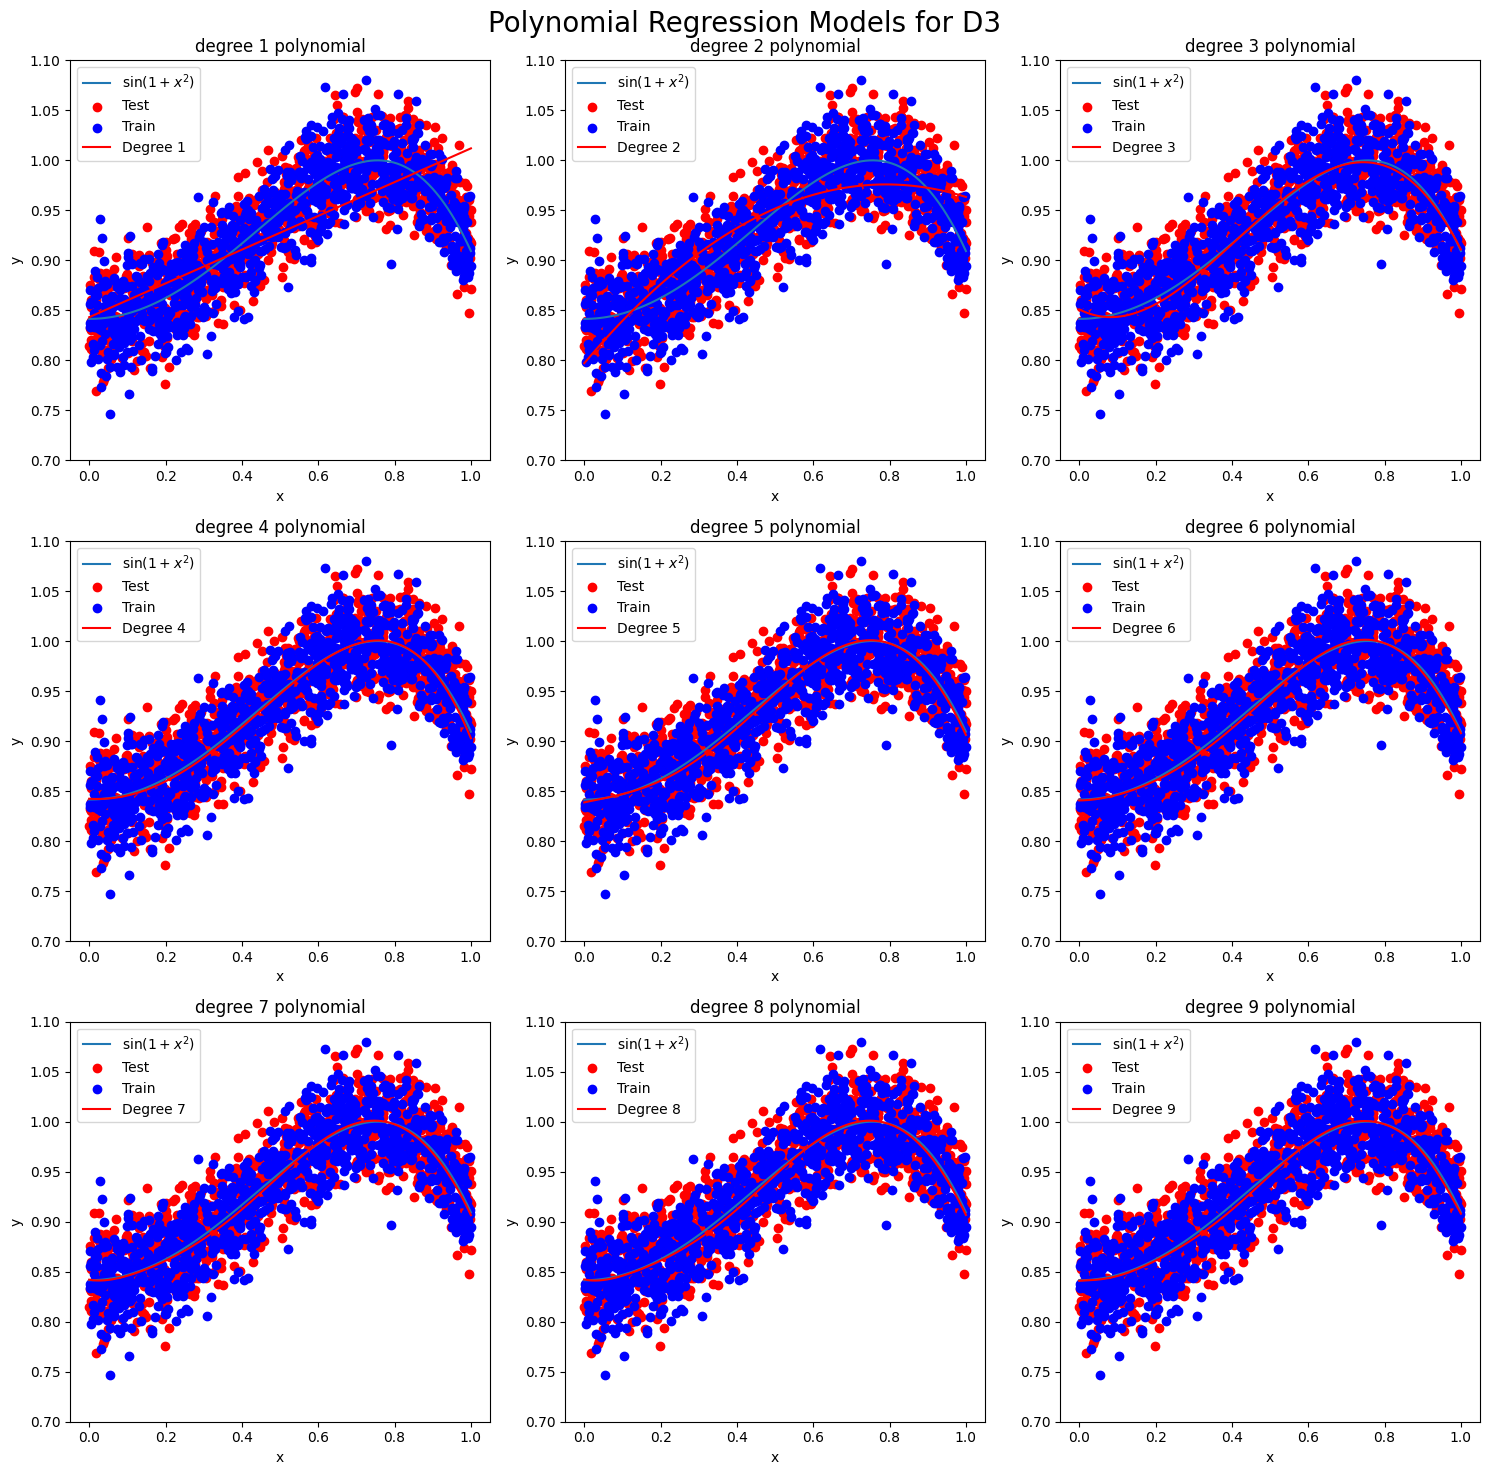

In [165]:
# Train model with data of dataset D3
for pipeline in pipelines_list:
    pipeline.fit(D3_X_train, D3_y_train)

# Draw a chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D3",size=20)

for i, (degree, pipeline) in enumerate(zip(range(1, 10), pipelines_list)):
    y_pred = pipeline.predict(X_pred)
    ax = axs[i // 3, i % 3]
    ax.plot(X_visual_target, y_visual_target, label=r'$\sin(1 + x^2)$')
    ax.scatter(D3_X_test, D3_y_test, color='red', label='Test')
    ax.scatter(D3_X_train, D3_y_train, color='blue', label='Train')
    ax.plot(X_pred, y_pred, color='red', label=f'Degree {degree}')
    ax.set_title(f'degree {i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

# Trả lời câu hỏi

**1.Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?**
- Khi tăng độ phức tạp của mô hình, thường sẽ làm giảm bias do mô hình có khả năng nắm bắt các mẫu phức tạp trong dữ liệu và dẫn đến dự đoán chính xác hơn. Nhưng nếu bias quá thấp thì có thể dẫn đến overfitting.

**2.Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?**
- Khi tăng độ phức tạp của mô hình, thường sẽ làm tăng variance do mô hình phức tạp có khả năng học trên tập train tốt hơn do có khả năng học cả các mẫu nhiễu và các đặc trưng không quan trọng trong dữ liệu, nhưng điều này có thể khiến mô hình bị overfitting và khả năng tổng quát hóa kém trên tập dữ liệu mới cũng như quá nhạy cảm với dữ liệu.

**3. Tăng kích thước tập train ảnh hưởng thế nào đến bias?**

Khi tăng kích thước tập train, tùy trường hợp có thể làm tăng, giảm hoặc không đổi bias. Ví dụ:

- ***Khi mô hình quá đơn giản so với dữ liệu (underfitting)***:
  - Khi tăng tập train có thể làm tăng bias do mô hình không nắm bắt được hết đặc trưng.

- ***Khi mô hình đã đủ phức tạp để học***:
  - Tăng kích thước tập train thường không làm giảm bias.

- ***Khi mô hình bị overfitting***:
  - Tăng kích thước tập train có thể làm giảm bias nếu dữ liệu trở nên đa dạng và đầy đủ hơn.

**4.Tăng kích thước tập train ảnh hưởng thế nào đến variance?**
- Tăng kích thước tập train có thể làm giảm variance, do khi kích thước tập train lớn, mô hình cso nhiều thông tin hơn để học các mẫu thực tế trong dữ liệu. Điều này làm giảm nhạy cảm với nhiễu và cho dự đoán ổn định hơn. Đặc biệt khi bạn có nhiều điểm dữ liệu, mô hình có thể học được mối quan hệ thật sự giữa các biến đầu vào và đầu ra.